# DOGE/BUSD analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DOGE-USD.csv")

In [3]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979
2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,687256067


In [4]:
# Moving average with a window of 10 days
df["MA_10"] = df['Close'].rolling(window=10).mean()

Text(0.5, 1.0, 'DOGE/BUSD Price 1/1/2021 - 24/1/2021')

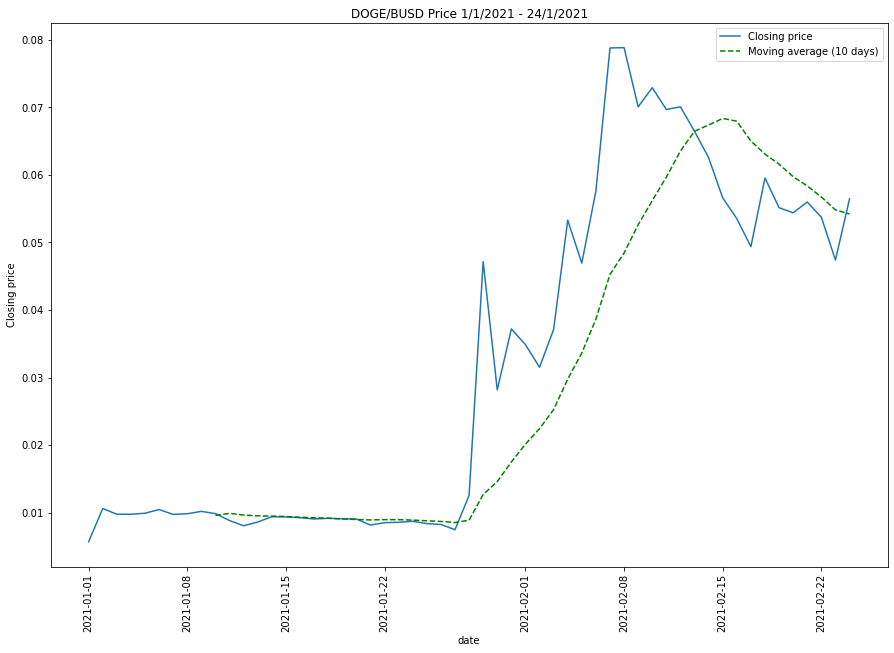

In [5]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'], label="Closing price")
plt.plot(df['MA_10'], 'g--', label="Moving average (10 days)")
plt.xticks(rotation='vertical')
plt.xlabel("date")
plt.ylabel("Closing price")
plt.legend()
plt.title("DOGE/BUSD Price 1/1/2021 - 24/1/2021")

## Analysis of the correlation between the price and Elon Musk tweets

In [6]:
import os
import tweepy as tw
import pandas as pd

# consumer key, consumer secret, access token, access secret.

auth = tw.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)
api = tw.API(auth, wait_on_rate_limit=True)


In [7]:
max_tweets = 1000
account_name = "elonmusk"

# Collect tweets
results = api.user_timeline(screen_name = account_name, count = max_tweets, tweet_mode="extended")

data = users_locs = [[tweet.created_at , tweet.full_text] for tweet in results]

data_df = pd.DataFrame(data)
data_df.columns = ['date', 'text']


In [8]:
print(data_df)

                   date                                               text
0   2021-02-24 22:43:08   @jeff_foust Rockets are ridiculously hard (sigh)
1   2021-02-24 13:15:48             @VitoTheGreat_ I love dogs &amp; memes
2   2021-02-24 13:10:13                                 On the actual moon
3   2021-02-24 13:00:05                  Literally https://t.co/XBAUqiVsPH
4   2021-02-24 10:52:28  @flcnhvy @HsueEugene @teslaownersSV @cleantech...
..                  ...                                                ...
195 2021-01-31 20:56:10               On Clubhouse tonight at 10pm LA time
196 2021-01-31 19:57:34  @Erdayastronaut @TJ_Cooney @lrocket @SpaceX @F...
197 2021-01-31 19:19:08  RT @Commercial_Crew: Launch Alert 🚀 @NASA and ...
198 2021-01-31 18:57:21  @Erdayastronaut @TJ_Cooney @lrocket @SpaceX @F...
199 2021-01-31 18:46:50  @TJ_Cooney @lrocket @SpaceX @FelixSchlang @Mar...

[200 rows x 2 columns]


In [9]:
# All the tweets that contain one of the keywords use to refer to Dogecoin
mask = data_df['text'].str.contains("doge|dogecoin|dogs|moon",case=False)

In [10]:
# Agregating by days
tweets_count = data_df[mask].text.groupby(data_df['date'].dt.date).count()

In [11]:
tweets_count.head()

date
2021-02-01    1
2021-02-04    3
2021-02-06    1
2021-02-07    3
2021-02-08    1
Name: text, dtype: int64

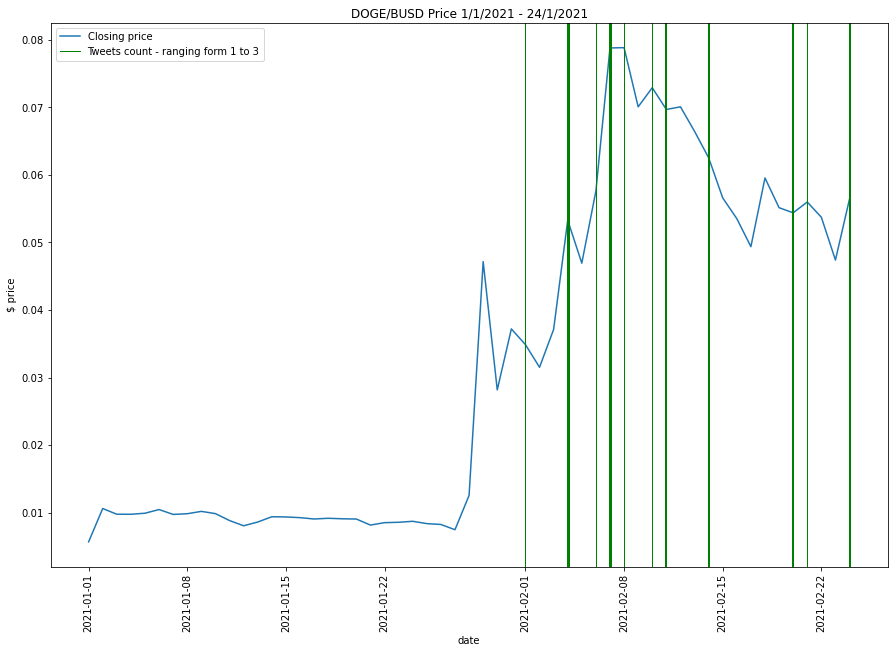

In [12]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'])
plt.xticks(rotation='vertical')
plt.xlabel("date")
plt.ylabel("$ price")

plt.title("DOGE/BUSD Price 1/1/2021 - 24/1/2021")

xcoords = tweets_count.index
count = tweets_count
min_count = min(tweets_count)
max_count = max(tweets_count)

for xc,c in zip(xcoords,count):
    plt.axvline(xc,linewidth=c,c='g')

plt.legend(["Closing price", "Tweets count - ranging form "+str(min_count)+" to "+str(max_count)])
